# (a-p)間の距離のヒストグラムを確認する

## 必要なパーツ
- 各モデルにおける埋め込みベクトル
    - PATH/TO/MODEL/gallery.txt
    - PATH/TO/MODEL/query.txt
- 実際の画像のパス
    - ./test_pairs.txt
- それぞれはインデックスで整合性をとる   

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from tqdm import tqdm

In [14]:
model = 'imp300a0.5b0.05'
# model = 'Dual300a0.1'

In [1]:
ALPHA = 0.5
BETA = 0.05

In [4]:
vec_length = 300
model_epoch = 99

In [5]:
model_PATH = './model/T_Shirt/improved_tripletloss/a{}b{}'.format(ALPHA,BETA)

In [8]:
f = open(model_PATH+'/{}/gallery{}.txt'.format(vec_length,model_epoch),'rb')
gallery = pickle.load(f)
print(gallery.shape)

(2032, 300)


In [9]:
f = open(model_PATH+'/{}/query{}.txt'.format(vec_length,model_epoch),'rb')
query = pickle.load(f)
print(query.shape)

(2032, 300)


In [65]:
# f = open('./model/T_Shirt/tripletloss/a0.1/300/gallery300.txt','rb')
# gallery = pickle.load(f)
# print(gallery.shape)

In [66]:
# f = open('./model/T_Shirt/tripletloss/a0.1/300/query300.txt','rb')
# query = pickle.load(f)
# print(query.shape)

## ユークリッド距離(の2乗)

In [10]:
def euclid_dist2(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [12]:
sim = []
for q,g in zip(query,gallery):
    sim.append(euclid_dist2(q,g))

/home/pip/koki_ishizuka/.conda/envs/py35-zukapy/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


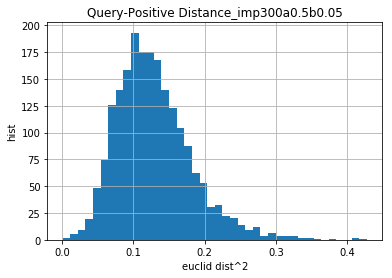

In [15]:
plt.hist(sim,bins=40)
plt.grid('True')
plt.title("Query-Positive Distance_{}".format(model))
plt.xlabel("euclid dist^2")
plt.ylabel("hist")
plt.savefig('./histgram/euclid_{}.png'.format(model),dpi=300)

## cos類似度

In [17]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [18]:
sim = []
for q,g in zip(query,gallery):
    sim.append(cos_sim(q,g))

(array([  2.,   1.,   0.,   1.,   1.,   2.,   3.,   5.,   6.,   7.,  12.,
         12.,  18.,  29.,  41.,  49.,  73., 111., 144., 170., 221., 235.,
        238., 228., 194., 126.,  68.,  24.,   6.,   5.]),
 array([0.8930357 , 0.89659507, 0.90015444, 0.90371381, 0.90727318,
        0.91083255, 0.91439192, 0.9179513 , 0.92151067, 0.92507004,
        0.92862941, 0.93218878, 0.93574815, 0.93930752, 0.94286689,
        0.94642626, 0.94998563, 0.953545  , 0.95710437, 0.96066374,
        0.96422311, 0.96778248, 0.97134185, 0.97490122, 0.97846059,
        0.98201996, 0.98557933, 0.9891387 , 0.99269808, 0.99625745,
        0.99981682]),
 <a list of 30 Patch objects>)

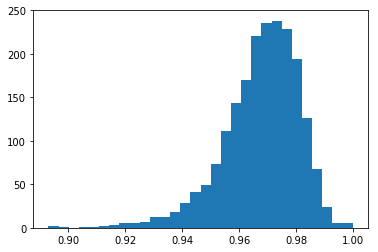

In [19]:
plt.hist(sim,bins=30)

In [20]:
# print(sim)